In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from itertools import product
from midaspy.iolib import *
from midaspy.model import MIDASRegressor
import matplotlib.pyplot as plt



In [3]:
# # Specify the file path
# file_path = 'estat_irt_euryld_d.tsv'

# # Read the TSV file into a pandas DataFrame
# df = pd.read_csv(file_path, sep='\\t')
# df.head()

In [4]:
# # Specify the file path
# file_path = 'estat_tec00027.tsv'

# # Read the TSV file into a pandas DataFrame
# df_2 = pd.read_csv(file_path, sep='\\t')
# df_2.head()
start_date = '2010-08-01'
end_date = '2021-07-01'
end_t_date = '2021-05-31'

### Loading data

In [5]:
# inflation data
file_path = 'inflation_HICP_monthly.csv'
# Read the TSV file into a pandas DataFrame
df_3 = pd.read_csv(file_path)
df_3['DATE'] = pd.to_datetime(df_3['DATE'])
# Set 'DATE' as the index
df_3.set_index('DATE', inplace=True)
# Now perform the slicing
y = df_3['HICP - Overall index (ICP.M.U2.N.000000.4.ANR)'].rename('HICP')[start_date:end_date]
y.rename_axis(None, inplace=True)

In [6]:
print (y)

2010-08-31    1.6
2010-09-30    1.9
2010-10-31    1.9
2010-11-30    1.9
2010-12-31    2.2
             ... 
2021-02-28    0.9
2021-03-31    1.3
2021-04-30    1.6
2021-05-31    2.0
2021-06-30    1.9
Name: HICP, Length: 131, dtype: float64


In [7]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
result = seasonal_decompose(df_3['HICP - Overall index (ICP.M.U2.N.000000.4.ANR)'], model='additive')  # Use 'multiplicative' if more appropriate
seasonal = result.seasonal[start_date:end_date]
trend = result.trend[start_date:end_date]
deasesoned = y- seasonal - trend
residuals = result.resid[start_date:end_date]
print(trend)

DATE
2010-08-31    1.791667
2010-09-30    1.904167
2010-10-31    2.000000
2010-11-30    2.091667
2010-12-31    2.183333
                ...   
2021-02-28    0.916667
2021-03-31    1.204167
2021-04-30    1.541667
2021-05-31    1.941667
2021-06-30    2.379167
Name: trend, Length: 131, dtype: float64


In [9]:
with pd.option_context('display.max_rows', None):
    print(deasesoned)

2010-08-31   -0.183939
2010-09-30   -0.017278
2010-10-31   -0.149329
2010-11-30   -0.228175
2010-12-31    0.025030
2011-01-31    0.077113
2011-02-28    0.086889
2011-03-31    0.282722
2011-04-30    0.270703
2011-05-31    0.082562
2011-06-30    0.011408
2011-07-31   -0.116038
2011-08-31   -0.246439
2011-09-30    0.220222
2011-10-31    0.192337
2011-11-30    0.225991
2011-12-31    0.095863
2012-01-31    0.056280
2012-02-29    0.045222
2012-03-31    0.036889
2012-04-30   -0.045964
2012-05-31   -0.188272
2012-06-30   -0.130259
2012-07-31   -0.061871
2012-08-31    0.199395
2012-09-30    0.253555
2012-10-31    0.217337
2012-11-30    0.030158
2012-12-31    0.150030
2013-01-31    0.056280
2013-02-28    0.028555
2013-03-31   -0.075611
2013-04-30   -0.458464
2013-05-31   -0.125772
2013-06-30    0.186408
2013-07-31    0.308962
2013-08-31    0.107728
2013-09-30   -0.013111
2013-10-31   -0.378496
2013-11-30   -0.107342
2013-12-31   -0.079137
2014-01-31    0.056280
2014-02-28    0.028555
2014-03-31 

In [10]:
if deasesoned.isnull().values.any():
    print("There are missing values in the series.")
else:
    print("There are no missing values in the series.")

There are no missing values in the series.


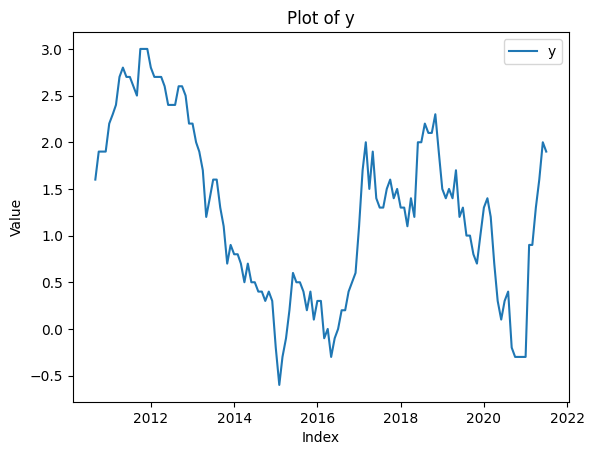

In [11]:
plt.plot(y, label='y')
plt.title('Plot of y')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

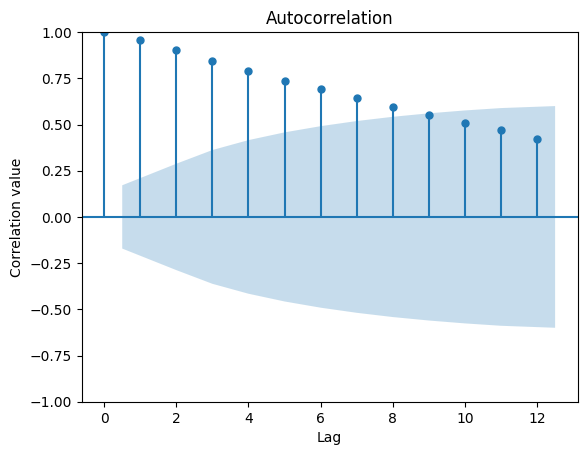

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load your data

# Plot the ACF
plot_acf(y, lags=12)  # Adjust 'lags' based on your data frequency and suspected season length
plt.xlabel('Lag')
plt.ylabel('Correlation value')
plt.show()


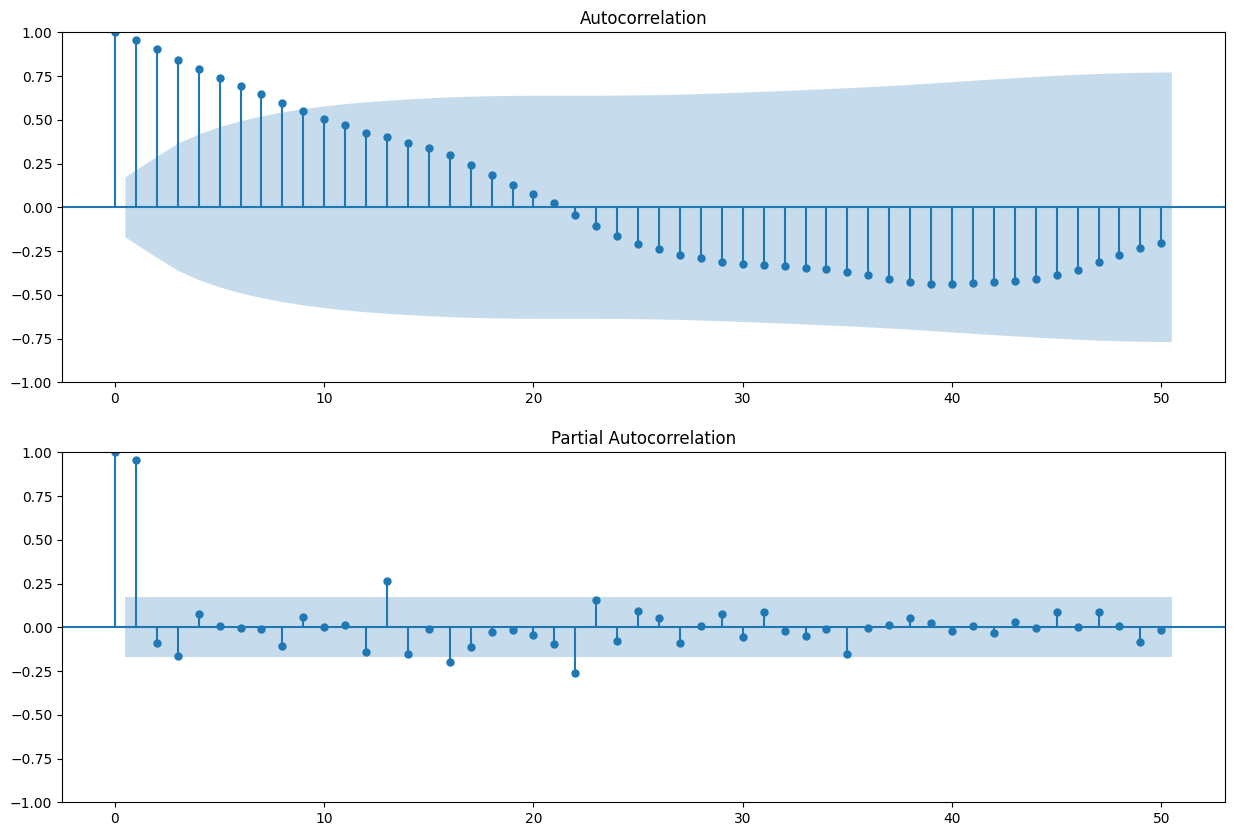

In [13]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming `data` is your time series data
fig, axes = plt.subplots(2, 1, figsize=(15,10))

# Plot the autocorrelation
plot_acf(y, lags=50, ax=axes[0])

# Plot the partial autocorrelation
plot_pacf(y, lags=50, ax=axes[1])

plt.show()

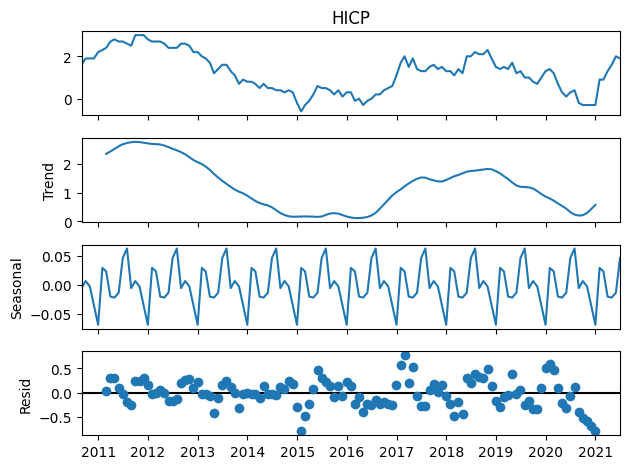

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your data is in a DataFrame and indexed by datetime
result = seasonal_decompose(y, model='additive')  # Change to 'multiplicative' if necessary
result.plot()
plt.show()

In [15]:
# from statsmodels.tsa.arima.model import ARIMA

# # Assuming 'result' is the output of your seasonal_decompose
# seasonal = result.seasonal

# # Fit an ARIMA model to the trend
# trend_model = ARIMA(trend, order=(5,1,0))
# trend_model_fit = trend_model.fit()

# # Forecast the trend
# trend_forecast = trend_model_fit.forecast(steps=1)  # forecast 10 steps ahead

# # Fit an ARIMA model to the seasonality
# seasonal_model = ARIMA(seasonal, order=(5,1,0))
# seasonal_model_fit = seasonal_model.fit()

# # Forecast the seasonality
# seasonal_forecast = seasonal_model_fit.forecast(steps=1)  # forecast 10 steps ahead

# # Combine the forecasts
# forecast = trend_forecast + seasonal_forecast
# print(forecast)

In [16]:
#Euro Libor rate data loading
Libor= pd.read_csv('LIBOR EUR.csv')
Libor['Date'] = pd.to_datetime(Libor['Date'], format='%d.%m.%Y')
Libor.set_index('Date', inplace=True)
Libor.interpolate(method = 'linear', inplace=True)	


C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\2373728006.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Libor.interpolate(method = 'linear', inplace=True)


In [17]:
#German bund prices data loading 
German_bund = pd.read_csv('German_bund.csv')
German_bund


,DATE,IRLTLT01DEM156N
0,1956-05-01,6.400000
1,1956-06-01,6.800000
2,1956-07-01,6.800000
3,1956-08-01,6.800000
4,1956-09-01,7.000000
...,...,...
810,2023-11-01,2.601364
811,2023-12-01,2.102105
812,2024-01-01,2.174545
813,2024-02-01,2.331905


In [18]:
#German bund yieald data loding
German_yeald = pd.read_csv('Germany 10-Year Bond Yield.csv')
German_yeald['Date'] = pd.to_datetime(German_yeald['Date'])
German_yeald.set_index('Date', inplace=True)
German_yeald.sort_index(inplace=True)
German_yeald = German_yeald
German_yeald.interpolate(method = 'linear', inplace=True)	
German_yeald

C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\3600230688.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  German_yeald.interpolate(method = 'linear', inplace=True)


,Price,Open,High,Low,Change %
Date,,,,,
2008-01-02,4.3240,4.324,4.3240,4.324,-1.01%
2008-01-03,4.2130,4.213,4.2130,4.213,-2.57%
2008-01-04,4.1930,4.193,4.1930,4.193,-0.47%
2008-01-07,4.1340,4.134,4.1340,4.134,-1.41%
2008-01-08,4.1130,4.113,4.1130,4.113,-0.51%
...,...,...,...,...,...
2024-04-30,2.5895,2.533,2.5955,2.510,2.53%
2024-05-01,2.5825,2.533,2.5835,2.582,-0.27%
2024-05-02,2.5345,2.558,2.5830,2.529,-1.86%


In [19]:
#Fibor data loading
Fibor = pd.read_csv('FIBOR.csv')
Fibor['DATE'] = pd.to_datetime(Fibor['DATE'])
Fibor.set_index('DATE', inplace=True)
# Resample Fibor DataFrame to daily frequency
Fibor_daily = Fibor.asfreq('D', method='ffill')
Fibor_daily = Fibor_daily[start_date:end_date]
#calculate the spread between the 3 months fibor and the 10 years German bund
cr_spread = pd.concat((Fibor_daily['IR3TIB01DEM156N'], German_yeald['Price']), axis=1)
cr_spread = cr_spread.interpolate()
cr_spread = cr_spread.fillna(method='bfill')
credit_spread = cr_spread['Price'] - cr_spread['IR3TIB01DEM156N']
credit_spread.interpolate(method = 'linear', inplace=True)	


C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\2906484122.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cr_spread = cr_spread.fillna(method='bfill')


In [20]:
file_path = 'USD_EUR Historical Data.csv'
# Read the TSV file into a pandas DataFrame
df_5 = pd.read_csv(file_path)
df_5['DATE'] = pd.to_datetime(df_5['Date'])
# # Set 'DATE' as the index
df_5.set_index('DATE', inplace=True)
df_5.sort_index(inplace=True)
# Now perform the slicing
ex_rate = df_5['Price'].rename('USD/EUR exchange rate')
# y.rename_axis(None, inplace=True)
df_5.interpolate(method = 'linear', inplace=True)	

C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\1687724258.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_5.interpolate(method = 'linear', inplace=True)


In [21]:
file_path = 'Euro Stoxx 50 Historical Data.csv'
# Read the TSV file into a pandas DataFrame
df_6 = pd.read_csv(file_path)
df_6['DATE'] = pd.to_datetime(df_6['Date'])
# # Set 'DATE' as the index
df_6.set_index('DATE', inplace=True)
df_6.sort_index(inplace=True)
# y.rename_axis(None, inplace=True)
df_6['Price'] = df_6['Price'].str.replace(',', '').astype(float)
# Now perform the slicing
eu50 = df_6['Price'].rename('Eurostoxx50_index')
eu50.interpolate(method = 'linear', inplace=True)	
# y.rename_axis(None, inplace=True)


In [22]:

file_path = 'CNY_EUR Historical Data.csv'
# Read the TSV file into a pandas DataFrame
df_7 = pd.read_csv(file_path)
df_7['DATE'] = pd.to_datetime(df_7['Date'])
# # Set 'DATE' as the index
df_7.set_index('DATE', inplace=True)
df_7.sort_index(inplace=True)
# Now perform the slicing
ex_rate_cny = df_7['Price'].rename('EUR/CNY exchange rate')
# y.rename_axis(None, inplace=True)
df_7.interpolate(method = 'linear', inplace=True)	


C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\373342736.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_7.interpolate(method = 'linear', inplace=True)


In [23]:
#oil data loading
file_path = 'crude_oil_daily+other.csv'
df_4 = pd.read_csv(file_path)
df_4['Date'] = pd.to_datetime(df_4['Date'])
# Set 'DATE' as the index
df_4.set_index('Date', inplace=True)

# Select the desired columns and date range
x1 = df_4['Brent Oil'].rename('OIL')[start_date:end_date].pct_change(14)
x2 = df_4['Brent Oil'].rename('OIL_7')[start_date:end_date].pct_change(7)
# Specify the file path
Libor.sort_index(inplace=True)
x3 = Libor['3M'].rename('LIBOR_3M').pct_change(14)
x3 = x3[start_date:end_date]
x4 = credit_spread.rename('INTEREST_SPREAD')[start_date:end_date].pct_change(7)
x5 = ex_rate.rename('USD/EUR exchange rate')[start_date:end_date].pct_change(14)
x6 = eu50.rename('Eurostoxx50_index')[start_date:end_date].pct_change(7)
x7 = ex_rate_cny.rename('CNY/EUR exchange rate')[start_date:end_date].pct_change(7)
x8 = German_yeald['Price'].rename('German_bund')[start_date:end_date].pct_change(7)

In [24]:
x11 = df_4['Brent Oil'].rename('OIL')[start_date:end_date]
x22 = df_4['Brent Oil'].rename('OIL_7')[start_date:end_date]
# Specify the file path
Libor.sort_index(inplace=True)
x33 = Libor['3M'].rename('LIBOR_3M').pct_change(14).fillna(method='ffill')
x33 = x3[start_date:end_date]
x44 = credit_spread.rename('INTEREST_SPREAD')[start_date:end_date]
x55 = ex_rate.rename('USD/EUR exchange rate')[start_date:end_date]
x66 = eu50.rename('Eurostoxx50_index')[start_date:end_date]
x77 = ex_rate_cny.rename('EUR/CNY exchange rate')[start_date:end_date]
x88 = German_yeald['Price'].rename('German_bund')[start_date:end_date]

C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\1094642562.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x33 = Libor['3M'].rename('LIBOR_3M').pct_change(14).fillna(method='ffill')


In [25]:
descriptive = pd.concat([x11, x33, x44, x55, x66, x77, x88
                         
                         ], axis=1)
descriptive_stats = descriptive.describe()
descriptive_stats 


,OIL,LIBOR_3M,INTEREST_SPREAD,USD/EUR exchange rate,Eurostoxx50_index,EUR/CNY exchange rate,German_bund
count,3988.000000,2771.000000,3988.000000,2763.000000,2534.000000,2528.000000,2951.000000
mean,76.102565,0.009151,0.731351,0.828077,3153.874929,0.126901,0.788072
std,27.087402,0.318214,0.546117,0.073159,440.893087,0.009542,0.990065
min,19.330000,-3.714000,-0.437364,0.674400,1995.010000,0.103800,-0.854000
25%,53.292500,-0.027467,0.323852,0.759200,2913.420000,0.120900,0.085000
50%,67.825000,0.005762,0.693396,0.843800,3220.080000,0.127500,0.503000
75%,106.930000,0.043488,1.079581,0.892500,3478.747500,0.133000,1.544000
max,126.650000,10.986014,2.222250,0.962700,4158.140000,0.152200,3.497000


In [26]:
descpriptive_y = y.describe()
descpriptive_y

count    131.000000
mean       1.251145
std        0.928967
min       -0.600000
25%        0.450000
50%        1.300000
75%        2.000000
max        3.000000
Name: HICP, dtype: float64

In [27]:
# # Specify the file path
# file_path = 'brent_oil_prices_daily_2.csv'

# # Read the TSV file into a pandas DataFrame
# df_5 = pd.read_csv(file_path)
# df_5['DATE'] = pd.to_datetime(df_3['DATE'])

# # Set 'DATE' as the index
# df_5.set_index('DATE', inplace=True)
# y = df_5.rename('OIL_BARREL_DOLLAR')['2010-07-18':'2024-02-29']

# df_5.head()

In [28]:
from scipy.stats import wilcoxon

def compare_models(benchmark_results, midas_results):
    # Perform the Wilcoxon signed-rank test
    stat, p_value = wilcoxon(benchmark_results, midas_results)

    # Determine the significance level
    significance = None
    if p_value < 0.01:
        significance = "1%"
    elif p_value < 0.05:
        significance = "5%"
    elif p_value < 0.10:
        significance = "10%"
    else:
        significance = "not significant"

    return {
        'statistic': stat,
        'p_value': p_value,
        'significance': significance
    }




### Data preprocessing

In [29]:
exogenous = pd.concat([x1, x3, x4, x5, x6, x7, x8], axis=1)
exogenous.interpolate(method='linear', inplace=True)
exogenous.fillna(method='ffill', inplace=True)
exogenous.fillna(method='bfill', inplace=True)
exogenous.tail(15)

C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\3294217293.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous.fillna(method='ffill', inplace=True)
C:\Users\abahe\AppData\Local\Temp\ipykernel_23640\3294217293.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous.fillna(method='bfill', inplace=True)


,OIL,LIBOR_3M,INTEREST_SPREAD,USD/EUR exchange rate,Eurostoxx50_index,CNY/EUR exchange rate,German_bund
2021-06-17,0.024821,0.008950,0.192627,0.005459,0.015168,0.021978,-0.147982
2021-06-18,0.022534,0.006809,0.240956,0.005459,-0.003290,0.021978,-0.178138
2021-06-19,0.022534,0.007075,0.222295,0.005459,-0.000870,0.021978,-0.182186
2021-06-20,0.022534,0.007341,0.200768,0.005459,0.001550,0.021978,-0.249071
2021-06-21,0.047699,0.007606,0.280365,0.005459,0.003970,0.021978,-0.318898
2021-06-22,0.035863,-0.000532,0.220511,0.005459,-0.000865,0.021978,-0.300000
2021-06-23,0.041124,-0.002622,0.225658,0.005459,-0.013727,0.021978,-0.272358
2021-06-24,0.041919,-0.005248,0.011334,0.005459,-0.005090,0.021978,-0.021053
2021-06-25,0.048012,-0.002866,0.138272,0.005459,-0.007491,0.021978,-0.231527
2021-06-26,0.048012,0.000615,0.133467,0.005459,-0.010463,0.021978,-0.225248


In [30]:
y

2010-08-31    1.6
2010-09-30    1.9
2010-10-31    1.9
2010-11-30    1.9
2010-12-31    2.2
             ... 
2021-02-28    0.9
2021-03-31    1.3
2021-04-30    1.6
2021-05-31    2.0
2021-06-30    1.9
Name: HICP, Length: 131, dtype: float64

### Fitting the model

In [31]:
model = MIDASRegressor(endog=y, exog=exogenous, xlag=22, ylag=1, poly='beta')
model2 = MIDASRegressor(endog=residuals, exog=exogenous, xlag=22, ylag=1, poly='beta')
model3 = MIDASRegressor(endog=y, exog = [], ylag = 1, poly='beta')

#model2 = MIDASRegressor(endog=y, exog=exogenous, xlag=22, ylag=1, poly='beta')
#model3 = MIDASRegressor(endog=y, exog=exogenous, xlag=22, ylag=2, poly='beta')
fit = model.fit()
fit_d = model2.fit()
fit_b = model3.fit()

#fit2 = model2.fit()
#fit3 = model3.fit()

### plotting the resutls

<Axes: >

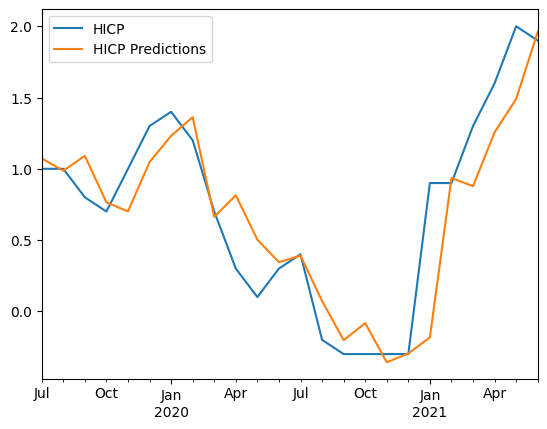

In [32]:
pd.concat([fit.orig_endog,fit.predict()], axis=1)[-24:].plot()



### Evaluation the model

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


evaluation = pd.concat([y,fit.predict()], axis=1)[-24:]

mae = mean_absolute_error(evaluation['HICP'], evaluation['HICP Predictions'])
mape = mean_absolute_percentage_error(evaluation['HICP'], evaluation['HICP Predictions'])
mse = mean_squared_error(evaluation['HICP'], evaluation['HICP Predictions'])
r2 = r2_score(evaluation['HICP'], evaluation['HICP Predictions'])

n = evaluation.shape[0]
k = 4

# Calculate adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
correlation1 = evaluation['HICP'].corr(evaluation['HICP Predictions'])

print("MIDAS - Correlation between True Data and Predictions:", correlation1)

MIDAS_results = pd.Series([mae, mape, mse, r2, adjusted_r2, correlation1])

print("Adjusted R-squared:", adjusted_r2)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)


MIDAS - Correlation between True Data and Predictions: 0.8796011607883046
Adjusted R-squared: 0.7219617929706232
R-squared: 0.770316263758341
Mean Absolute Error: 0.22649636291058398
Mean Absolute Percentage Error: 0.4977818392023825
Mean Squared Error: 0.10838201303903289


In [34]:
y[-24:]

2019-07-31    1.0
2019-08-31    1.0
2019-09-30    0.8
2019-10-31    0.7
2019-11-30    1.0
2019-12-31    1.3
2020-01-31    1.4
2020-02-29    1.2
2020-03-31    0.7
2020-04-30    0.3
2020-05-31    0.1
2020-06-30    0.3
2020-07-31    0.4
2020-08-31   -0.2
2020-09-30   -0.3
2020-10-31   -0.3
2020-11-30   -0.3
2020-12-31   -0.3
2021-01-31    0.9
2021-02-28    0.9
2021-03-31    1.3
2021-04-30    1.6
2021-05-31    2.0
2021-06-30    1.9
Name: HICP, dtype: float64

In [35]:

start_date = '2019-07-31 '
end_date = '2021-06-30'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')
predictions = fit_d.predict()[-24:]
predictions

,resid Predictions
DATE,
2019-07-31,-0.057434
2019-08-31,-0.029843
2019-09-30,-0.128715
2019-10-31,-0.216958
2019-11-30,-0.111113
2019-12-31,-0.017309
2020-01-31,0.286381
2020-02-29,0.589339
2020-03-31,0.281711


In [36]:
reshaped_results = pd.Series(predictions.values.ravel())
reshaped_results.index = date_range
#print(reshaped_results)
reshaped_results.rename('HICP Predictions', inplace=True)
results_2 = reshaped_results + trend[-24:] + seasonal[-24:]
results_2 = results_2.rename('HICP Predictions')
print(results_2)

2019-07-31    1.125271
2019-08-31    1.141596
2019-09-30    1.021897
2019-10-31    0.882371
2019-11-30    0.871229
2019-12-31    0.832661
2020-01-31    1.030101
2020-02-29    1.273284
2020-03-31    0.890656
2020-04-30    0.447067
2020-05-31    0.139450
2020-06-30    0.011377
2020-07-31    0.109726
2020-08-31    0.147188
2020-09-30   -0.066616
2020-10-31    0.103625
2020-11-30   -0.072329
2020-12-31   -0.042612
2021-01-31    0.115674
2021-02-28    0.909718
2021-03-31    1.089601
2021-04-30    1.466431
2021-05-31    1.811542
2021-06-30    2.312363
Freq: M, Name: HICP Predictions, dtype: float64


In [37]:

date_range = pd.date_range(start='2010-09-30', end='2021-06-30', freq='M')
# predictions = pd.Series(predictions, index=date_range)
# print(predictions)
# seasoned_predictions = predictions[-24:] + seasonal[-24:] + trend[-24:]
# seasoned_predictions = seasoned_predictions.rename("HICP Predictions")

evaluation = pd.concat([y,results_2], axis=1)[-24:]
mae = mean_absolute_error(evaluation['HICP'], evaluation['HICP Predictions'])
mape = mean_absolute_percentage_error(evaluation['HICP'], evaluation['HICP Predictions'])
mse = mean_squared_error(evaluation['HICP'], evaluation['HICP Predictions'])
r2 = r2_score(evaluation['HICP'], evaluation['HICP Predictions'])

n = evaluation.shape[0]
k = 4

# Calculate adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
correlation1 = evaluation['HICP'].corr(evaluation['HICP Predictions'])
print("Detrended - Correlation between True Data and Predictions:", correlation1)
print("Adjusted R-squared:", adjusted_r2)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)

Detrended - Correlation between True Data and Predictions: 0.9045824823824777
Adjusted R-squared: 0.7796516944495908
R-squared: 0.8179731388931403
Mean Absolute Error: 0.24477442792289647
Mean Absolute Percentage Error: 0.4740913836798533
Mean Squared Error: 0.08589392508479944


In [38]:
evaluation = pd.concat([y,fit_b.predict()], axis=1)[-24:]

mae = mean_absolute_error(evaluation['HICP'], evaluation['HICP Predictions'])
mape = mean_absolute_percentage_error(evaluation['HICP'], evaluation['HICP Predictions'])
mse = mean_squared_error(evaluation['HICP'], evaluation['HICP Predictions'])
r2 = r2_score(evaluation['HICP'], evaluation['HICP Predictions'])

n = evaluation.shape[0]
k = 4

# Calculate adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
correlation1 = evaluation['HICP'].corr(evaluation['HICP Predictions'])
Benchmark_results = pd.Series([mae, mape, mse, r2, adjusted_r2, correlation1])
print("Benchmark - Correlation between True Data and Predictions:", correlation1)
print("Adjusted R-squared:", adjusted_r2)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)

Benchmark - Correlation between True Data and Predictions: 0.8581218235947279
Adjusted R-squared: 0.6772101507728814
R-squared: 0.7333475158558586
Mean Absolute Error: 0.2581608416155054
Mean Absolute Percentage Error: 0.5439080362370837
Mean Squared Error: 0.12582664095551674


In [39]:
comparison_result = compare_models(Benchmark_results, MIDAS_results)
comparison_result

{'statistic': 10.0, 'p_value': 1.0, 'significance': 'not significant'}

In [40]:
fit_b.significance()

,coef,std err,t,P>|t|,0.025,0.975
Constant,0.053,0.039,1.344,0.181,-0.025,0.131
HICP t-1,0.959,0.025,37.820,0.000,0.909,1.010


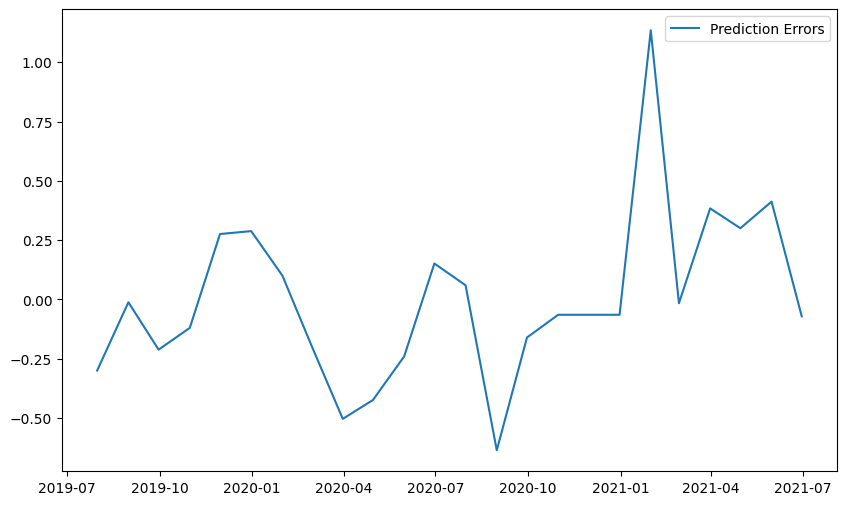

In [41]:
# Calculate the errors
errors = evaluation['HICP'] - evaluation['HICP Predictions']

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Prediction Errors')
plt.legend()
plt.show()

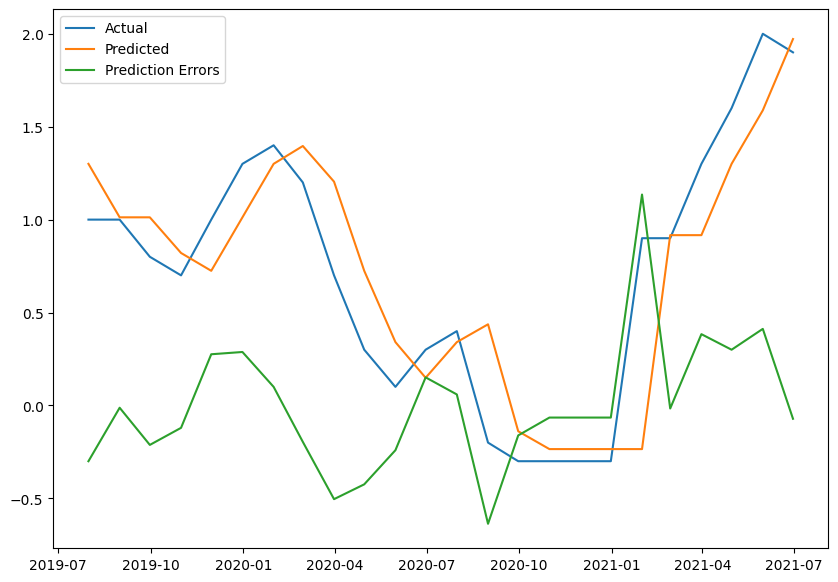

In [42]:
import matplotlib.pyplot as plt

# Assuming 'evaluation' is your DataFrame with actual and predicted values
actual = evaluation['HICP']
predicted = evaluation['HICP Predictions']

# Calculate prediction errors
errors = actual - predicted

# Create a new figure
plt.figure(figsize=(10, 7))

# Plot actual data
plt.plot(actual.index, actual, label='Actual')

# Plot predicted data
plt.plot(predicted.index, predicted, label='Predicted')

# Plot prediction errors
plt.plot(errors.index, errors, label='Prediction Errors')

# Add legend
plt.legend()

# Show the plot
plt.show()

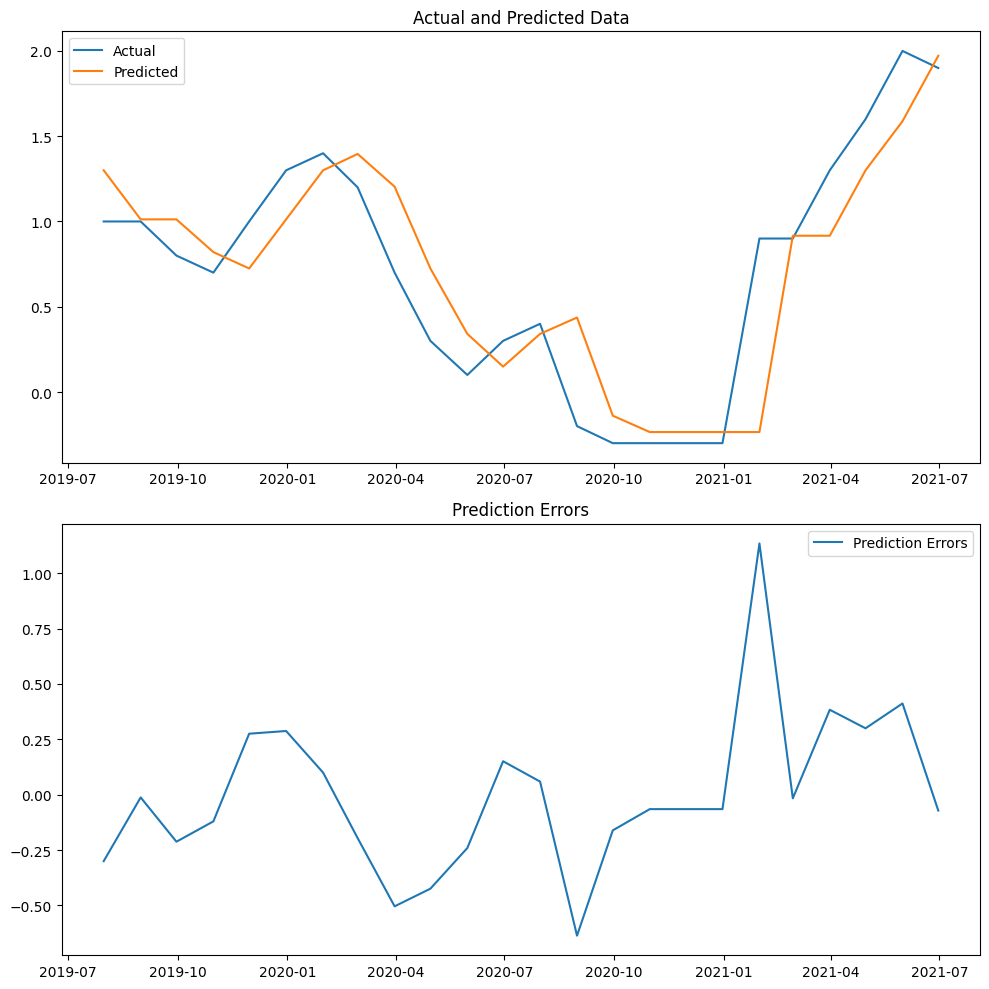

In [43]:
import matplotlib.pyplot as plt

# Assuming 'evaluation' is your DataFrame with actual and predicted values

actual = evaluation['HICP']
predicted = evaluation['HICP Predictions']

# Calculate prediction errors
errors = actual - predicted

# Create a new figure with 2 subplots
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot actual and predicted data on the first subplot
axs[0].plot(actual.index, actual, label='Actual')
axs[0].plot(predicted.index, predicted, label='Predicted')
axs[0].legend()
axs[0].set_title('Actual and Predicted Data')

# Plot prediction errors on the second subplot
axs[1].plot(errors.index, errors, label='Prediction Errors')
axs[1].legend()
axs[1].set_title('Prediction Errors')

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
fit.score()

0.9328158946629311

In [45]:
fit.significance()

,coef,std err,t,P>|t|,0.025,0.975
Constant,0.092,0.040,2.320,0.022,0.014,0.171
OIL,0.821,0.273,3.003,0.003,0.280,1.362
LIBOR_3M,-0.005,0.104,-0.046,0.963,-0.210,0.201
INTEREST_SPREAD,0.108,0.050,2.190,0.030,0.010,0.206
USD/EUR exchange rate,2.224,1.293,1.720,0.088,-0.334,4.781
Eurostoxx50_index,-2.087,0.916,-2.279,0.024,-3.899,-0.275
CNY/EUR exchange rate,-3.621,1.809,-2.002,0.047,-7.200,-0.042
German_bund,-0.008,0.012,-0.717,0.475,-0.031,0.015
HICP t-1,0.935,0.025,37.147,0.000,0.885,0.985


In [46]:
fit_d.significance()

,coef,std err,t,P>|t|,0.025,0.975
Constant,0.007,0.020,0.368,0.714,-0.032,0.047
OIL,-0.325,0.350,-0.928,0.355,-1.016,0.367
LIBOR_3M,0.094,0.071,1.322,0.188,-0.047,0.234
INTEREST_SPREAD,0.019,0.022,0.845,0.400,-0.025,0.062
USD/EUR exchange rate,1.279,1.201,1.065,0.289,-1.096,3.655
Eurostoxx50_index,-1.373,0.659,-2.084,0.039,-2.676,-0.070
CNY/EUR exchange rate,-5.449,2.138,-2.548,0.012,-9.680,-1.219
German_bund,0.049,0.023,2.162,0.032,0.004,0.095
resid t-1,0.508,0.075,6.779,0.000,0.360,0.657


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming `exogenous` is your DataFrame containing the features
exogenous = add_constant(exogenous)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(exogenous.values, i) for i in range(exogenous.shape[1])]
vif["features"] = exogenous.columns

print(vif)

   VIF Factor               features
0    1.053404                  const
1    1.104348                    OIL
2    1.018380               LIBOR_3M
3    1.000592        INTEREST_SPREAD
4    1.399970  USD/EUR exchange rate
5    1.089363      Eurostoxx50_index
6    1.365681  CNY/EUR exchange rate
7    1.001038            German_bund


                            OIL  LIBOR_3M  INTEREST_SPREAD  \
OIL                    1.000000  0.003845        -0.002472   
LIBOR_3M               0.003845  1.000000        -0.005676   
INTEREST_SPREAD       -0.002472 -0.005676         1.000000   
USD/EUR exchange rate -0.129318 -0.104295        -0.011969   
Eurostoxx50_index      0.252537 -0.031457        -0.020565   
CNY/EUR exchange rate  0.036098  0.015175        -0.009665   
German_bund           -0.015022  0.000487         0.001416   

                       USD/EUR exchange rate  Eurostoxx50_index  \
OIL                                -0.129318           0.252537   
LIBOR_3M                           -0.104295          -0.031457   
INTEREST_SPREAD                    -0.011969          -0.020565   
USD/EUR exchange rate               1.000000           0.077391   
Eurostoxx50_index                   0.077391           1.000000   
CNY/EUR exchange rate               0.498823           0.124524   
German_bund                       

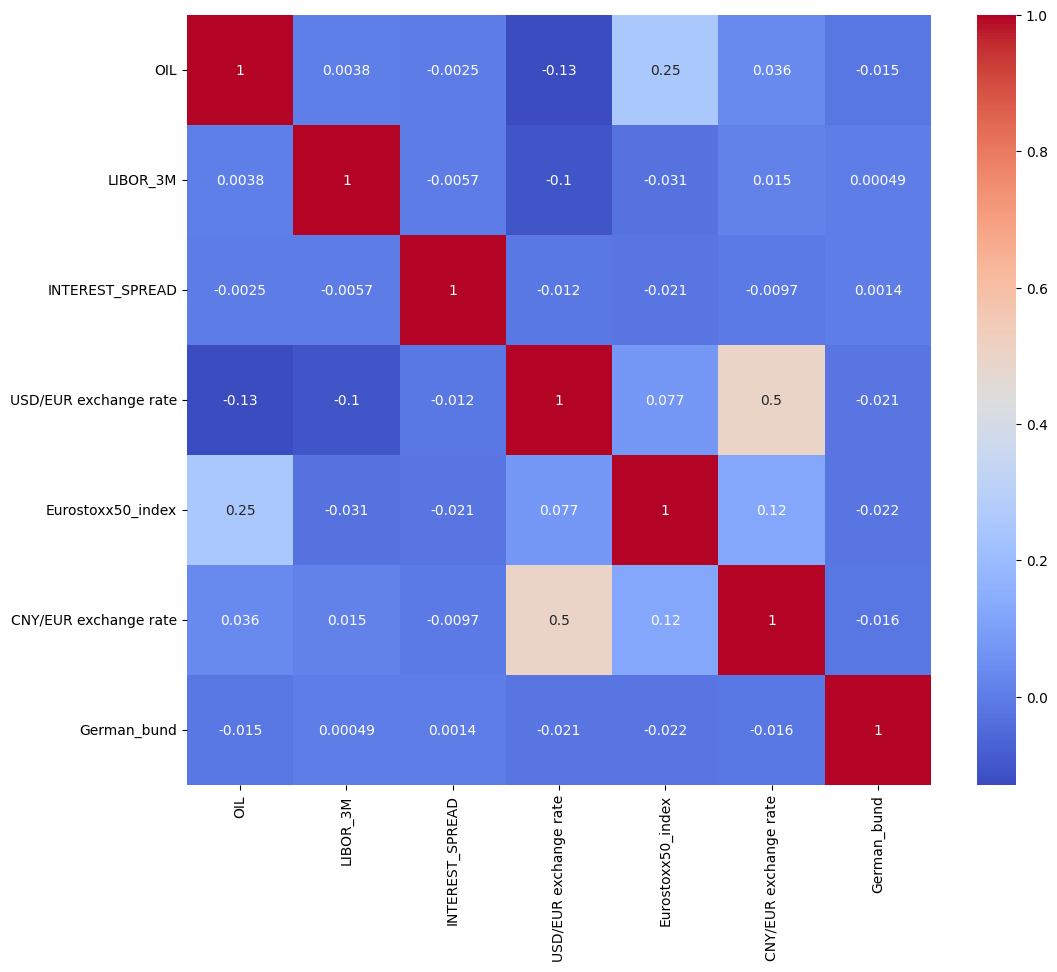

In [63]:
correlation_table = exogenous.corr()

# Assuming your DataFrame is named "df"
correlation_table = correlation_table.drop(correlation_table.index[0])  # Delete the first row
correlation_table = correlation_table.drop(correlation_table.columns[0], axis=1)  # Delete the first column

print(correlation_table)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm')
plt.show()


In [49]:

evaluation = pd.concat([y,fit.predict()], axis=1)
actual = evaluation['HICP']
predicted = evaluation['HICP Predictions']

# Calculate prediction errors
resuduals = actual - predicted

exogenous = exogenous.drop(exogenous.index[-1])

In [50]:
# from statsmodels.compat import lzip
# import statsmodels.stats.api as sms
# name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
# test = sms.het_breuschpagan(resuduals, exogenous)
# lzip(name, test)

In [51]:


# evaluation = pd.concat([fit2.orig_endog,fit2.predict()], axis=1)[-24:]

# mae = mean_absolute_error(evaluation['HICP'], evaluation['HICP Predictions'])
# mape = mean_absolute_percentage_error(evaluation['HICP'], evaluation['HICP Predictions'])
# mse = mean_squared_error(evaluation['HICP'], evaluation['HICP Predictions'])


# print("Mean Absolute Error:", mae)
# print("Mean Absolute Percentage Error:", mape)
# print("Mean Squared Error:", mse)


# fit2.significance()

In [52]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.metrics import mean_squared_error

# evaluation = pd.concat([fit3.orig_endog,fit3.predict()], axis=1)[-24:]

# mae = mean_absolute_error(evaluation['HICP'], evaluation['HICP Predictions'])
# mape = mean_absolute_percentage_error(evaluation['HICP'], evaluation['HICP Predictions'])
# mse = mean_squared_error(evaluation['HICP'], evaluation['HICP Predictions'])


# print("Mean Absolute Error:", mae)
# print("Mean Absolute Percentage Error:", mape)
# print("Mean Squared Error:", mse)
# fit3.significance()

In [53]:
y_test = df_3['HICP - Overall index (ICP.M.U2.N.000000.4.ANR)'].rename('HICP')['2021-06-01':'2022-06-01']
y.rename_axis(None, inplace=True)
x1_test = df_4['Brent Oil'].rename('OIL_3')['2021-06-01':'2022-06-01'].pct_change(3).dropna()
x2_test = df_4['Brent Oil'].rename('OIL_7')['2021-06-01':'2022-06-01'].pct_change(7).dropna()

exogenous_test = pd.concat([x1,x2],axis=1).dropna()


In [54]:

# preds = fit.predict(endog=y_test,exog=exogenous_test)
# preds.index = y_test.index[1:]
# pd.concat([y_test[1:], preds], axis=1).plot()

### Out of sample predictions

In [55]:


# # Select the desired columns and date range
# x1_test = df_4['Brent Oil'].rename('OIL_3')[end_date:end_t_date].pct_change(3)
# x2_test = df_4['Brent Oil'].rename('OIL_7')[end_date:end_t_date].pct_change(7)
# # Specify the file path
# Libor.sort_index(inplace=True)
# x3_test = Libor['3M'].rename('LIBOR_3M').pct_change(14).ffill()
# x3_test = x3[end_date:end_t_date]
# x4_test = credit_spread.rename('INTEREST_SPREAD')[end_date:end_t_date].pct_change(7)
# y_test = df_3['HICP - Overall index (ICP.M.U2.N.000000.4.ANR)'].rename('HICP')[end_date:end_t_date]
# exogenous_test = pd.concat([x1_test, x2_test, x3_test, x4_test], axis=1)
# exogenous_test.ffill()
# exogenous_test.bfill()
# print(exogenous_test)

In [56]:
# exogenous_test.fillna(method = 'ffill', inplace=True)	
# exogenous_test.fillna(method = 'bfill', inplace=True)
# print(exogenous_test)

In [57]:
# preds = fit.predict(endog=y_test,exog=exogenous_test)
# preds.index = y_test.index[1:]
# print(preds)
# pd.concat([y_test[1:], preds], axis=1).plot()

In [58]:
# evaluation_test = pd.concat([y_test[1:], preds], axis=1)

# mae = mean_absolute_error(evaluation_test['HICP'], evaluation_test['HICP Predictions'])
# mape = mean_absolute_percentage_error(evaluation_test['HICP'], evaluation_test['HICP Predictions'])
# mse = mean_squared_error(evaluation_test['HICP'], evaluation_test['HICP Predictions'])
# r2 = r2_score(evaluation_test['HICP'], evaluation_test['HICP Predictions'])

# n = evaluation_test.shape[0]
# k = 4

# # Calculate adjusted R-squared
# adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# print("Adjusted R-squared:", adjusted_r2)
# print("R-squared:", r2)
# print("Mean Absolute Error:", mae)
# print("Mean Absolute Percentage Error:", mape)
# print("Mean Squared Error:", mse)
